In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nu=390.5
w=2*np.pi*nu
w, 2*np.pi

(2453.5838624536286, 6.283185307179586)

In [3]:
ed=pd.read_excel('exp_data.xlsx')
ed

,T,N,k1,k2,k3,k4,fi
0,76,2,0,0,0,8,7.0
1,142,3,0,0,0,7,10.0
2,142,3,0,0,0,7,10.0
3,174,3,0,0,0,6,10.0
4,101,3,0,5,0,6,5.0
5,89,3,8,0,0,5,5.0
6,125,2,0,0,2,3,10.0
7,177,2,0,0,0,4,10.0
8,74,2,0,6,0,4,2.5
9,72,1,0,0,0,5,5.0


In [4]:
ud=pd.read_excel('ust_data.xlsx')
ud

,kr,M
0,96.0,56.7
1,110.0,76.0
2,114.5,92.8
3,121.0,116.4
4,NaN,141.2
5,NaN,178.5
6,NaN,219.1
7,NaN,272.5
8,NaN,341.1


In [5]:
m=np.zeros(10)
m[1:]=ud.M/1000
kr=ud.kr[:4]/100

In [6]:
Y=2*np.pi*ed['N']/ed['T']
X=np.zeros(Y.shape[0])
for i in range(Y.shape[0]):
    for j in range(1,5):
        #print(i,k[j-1],ed[f'k{j}'][i])
        X[i]+=kr[j-1]*m[ed[f'k{j}'][i]]
X=np.delete(X,5)
Y=np.delete(Y,5)
T=np.delete(ed['T']/ed['N'],5)
N=np.delete(ed['N'],5)
X,Y

(array([0.329725, 0.265111, 0.265111, 0.215985, 0.371305, 0.199308,
        0.140844, 0.337194, 0.170852, 0.112288, 0.09196 , 0.068607,
        0.140844, 0.412731, 0.412731]),
 array([0.16534698, 0.13274335, 0.13274335, 0.10833078, 0.18662927,
        0.10053096, 0.07099644, 0.16981582, 0.08726646, 0.05711987,
        0.04688944, 0.03490659, 0.07059759, 0.20943951, 0.20943951]))

In [7]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=np.sqrt((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)/np.sqrt(X.shape[0])
    sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return k,b,sigk,sigb
k,b,sigk,sigb=getkb(X,Y)

k,b-0.000013

(np.float64(0.5043290751604298), np.float64(9.292576448517567e-08))

In [8]:
sigk,sigb

(np.float64(0.0017639087575563861), np.float64(0.00019834669998655357))

In [9]:
sigk/k,sigb/b

(np.float64(0.0034975353284862217), np.float64(15.149150278127522))

In [10]:
0.5/20

0.025

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


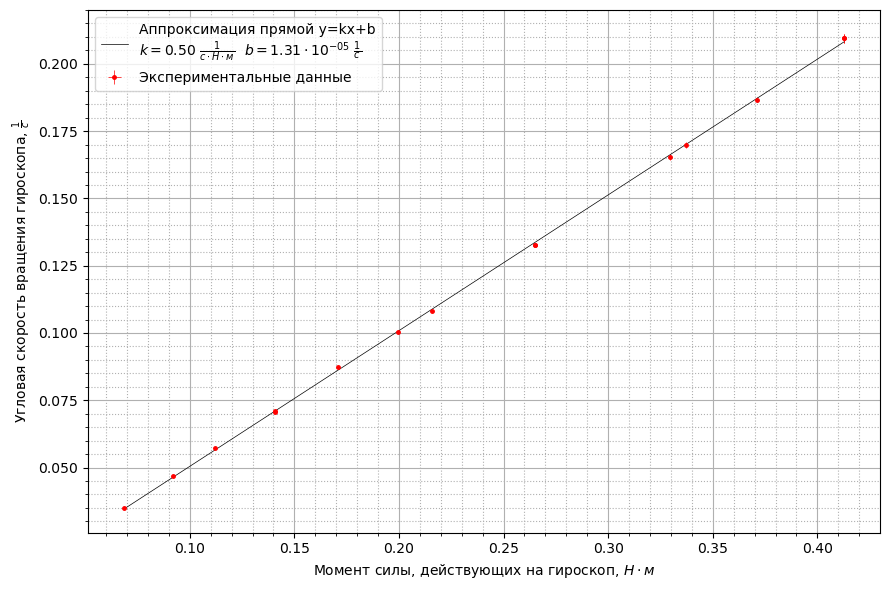

In [11]:
#plt.scatter(X,Y)
fig,ax = plt.subplots(figsize=(9,6))

ax.set_ylabel(r"Угловая скорость вращения гироскопа, $\frac{1}{с}$")
ax.set_xlabel(r"Момент силы, действующих на гироскоп, $Н \cdot м$")

ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')

ax.errorbar(X,Y, xerr=0, yerr=Y*(0.5/T/N), fmt='r.', label='Экспериментальные данные',markersize=5,capsize=0.01, elinewidth=0.5)
Xp=np.linspace(np.min(X),np.max(X),10)
ax.plot(Xp,Xp*k+b,'black',linewidth=0.5, label='Аппроксимация прямой y=kx+b\n'+'$k={0:.2f}{3}~~b={1:.2e}{2}{4}$'.format(k,b,'}', r'~\frac{1}{с \cdot Н \cdot м}', r'~\frac{1}{с}').replace('e',r'\cdot 10^{'))
ax.legend()
fig.tight_layout()
fig.savefig('gr1.eps')

In [12]:
I=1/k/w
I

np.float64(0.0008081371783886388)

In [13]:
Tr=3.2
Td=4
md=1616.3/1000
dd=78/1000
Ir=(md*dd**2/4)/2 * (Tr/Td)**2
Ir, Ir*np.sqrt((50/1616.3)**2+(2*1/78)**2+4*(0.5/20/3.2)**2+4*(0.5/20/4)**2)

(0.0007866855360000001, np.float64(3.5311735201154406e-05))

In [14]:
1/Ir/k, 1/Ir/k*(0.3/7.8)

(np.float64(2520.489126602136), np.float64(96.94188948469754))

In [15]:
wr=1/k/Ir
wr/(2*np.pi)

np.float64(401.14830350810394)

In [16]:
I*w-Ir*wr

np.float64(0.0)

In [17]:
fi=2*np.pi*ed['fi']/180
k1,b1,sk1,sb1=getkb(ed['T'],fi)
k1,b1,sk1,sb1

(np.float64(0.0019126803967824035),
 np.float64(0.012478399397606837),
 np.float64(0.00032077968161399337),
 np.float64(0.013716320786075611))

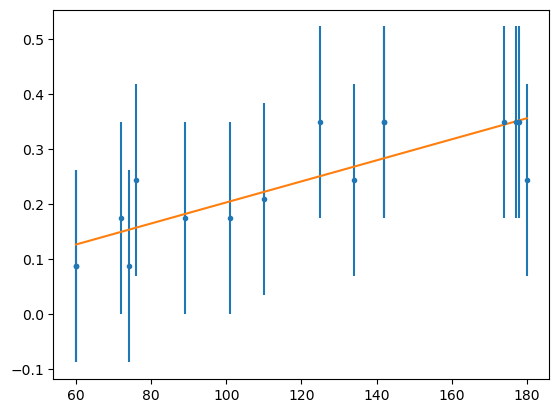

In [18]:
plt.errorbar(ed['T'],fi,fmt='.', yerr=2*np.pi*5/180)
xl=np.linspace(60,180,10)
plt.plot(xl,k1*xl+b1)

In [19]:
X=np.delete(ed['T'],5)
Y=np.delete(fi,5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


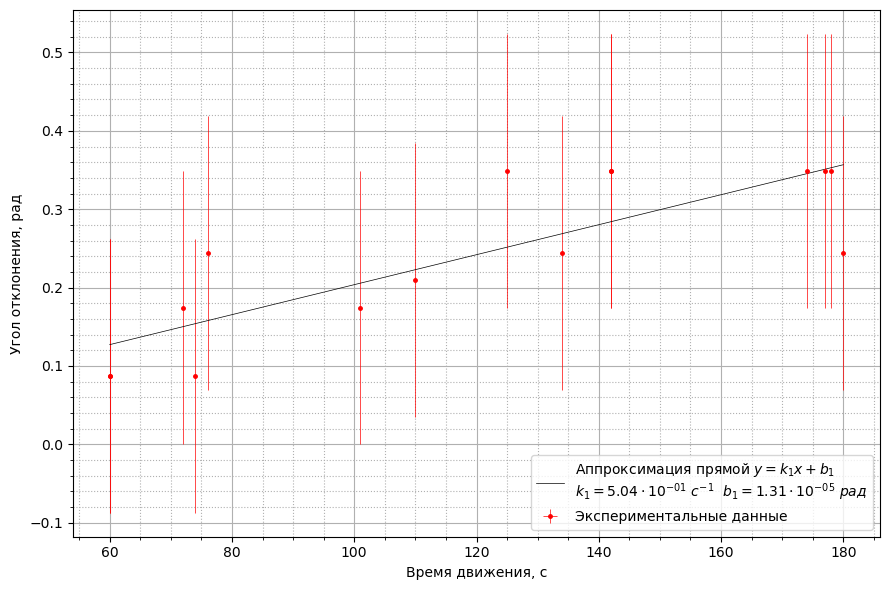

In [22]:
#plt.scatter(X,Y)
fig,ax = plt.subplots(figsize=(9,6))

ax.set_ylabel(r"Угол отклонения, рад")
ax.set_xlabel(r"Время движения, с")

ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')

ax.errorbar(X,Y, xerr=0, yerr=2*np.pi*5/180, fmt='r.', label='Экспериментальные данные',markersize=5,capsize=0.01, elinewidth=0.5)
Xp=np.linspace(np.min(X),np.max(X),10)
ax.plot(Xp,Xp*k1+b1,'black',linewidth=0.5, label='Аппроксимация прямой $y=k_1x+b_1$\n'+'$k_1={0:.2e}{2}{3}~~b_1={1:.2e}{2}{4}$'.format(k,b,'}', r'~с^{-1}', r'~рад').replace('e',r'\cdot 10^{'))
ax.legend()
fig.tight_layout()
fig.savefig('gr2.eps')

In [25]:
k1*k,sk1*k,0.00016/0.001

(np.float64(0.0009646203355867535), np.float64(0.0001617785201586424), 0.16)

In [28]:
0.5/np.sqrt(X.shape[0])

np.float64(0.12909944487358055)

In [29]:
np.sqrt(0.16**2+0.13**2)

np.float64(0.20615528128088303)